## 106

# Introduction to Scikit- Learn (sklearn)
 
This notebook demonstrate some of the most use full functions of the beautiful Scikit-Learn Library.

what we're going to cover
0. an end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/ algorithm for our problems.
3. Fit the model/ algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. putting it all together


In [1]:
what_were_covering = [
    "0. an end-to-end Scikit-Learn workflow",
"1. Getting the data ready",
"2. Choose the right estimator/ algorithm for our problems.",
"3. Fit the model/ algorithm and use it to make predictions on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save and load a trained model",
"7. putting it all together"
]

In [2]:
what_were_covering

['0. an end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/ algorithm for our problems.',
 '3. Fit the model/ algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. putting it all together']

In [3]:
#  standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-Learn  workflow

In [4]:
# Get the data ready
heart_disease = pd.read_csv("../sample_datas/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
#  Create x (features matrix)
x = heart_disease.drop("target", axis=1)

#  Create Y (labels)
y= heart_disease["target"]

In [6]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

#  we'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
#  3. fit the model to the data
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [8]:
clf.fit(x_train, y_train);

In [9]:
# Make prediction
# y_label = clf.predict(np.array([0,2,3,4]))

In [10]:
y_preds = clf.predict(x_test)
y_preds

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [11]:
#  4. Evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [12]:
clf.score(x_test, y_test)

0.8360655737704918

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81        29
           1       0.79      0.94      0.86        32

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



In [14]:
confusion_matrix(y_test, y_preds)

array([[21,  8],
       [ 2, 30]], dtype=int64)

In [15]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [16]:
#  5. Improve our model
#  Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators..
Model accuracy on test set: 81.97%

Trying model with 20 estimators..
Model accuracy on test set: 83.61%

Trying model with 30 estimators..
Model accuracy on test set: 81.97%

Trying model with 40 estimators..
Model accuracy on test set: 85.25%

Trying model with 50 estimators..
Model accuracy on test set: 86.89%

Trying model with 60 estimators..
Model accuracy on test set: 85.25%

Trying model with 70 estimators..


Model accuracy on test set: 85.25%

Trying model with 80 estimators..
Model accuracy on test set: 86.89%

Trying model with 90 estimators..
Model accuracy on test set: 86.89%



In [17]:
# 6. save model and load it
import pickle

pickle.dump(clf, open("../sample_datas/random_forest_model_1.pkl", "wb"))

In [18]:
loaded_moedel = pickle.load(open("../sample_datas/random_forest_model_1.pkl", "rb"))
loaded_moedel.score(x_test, y_test)

0.8688524590163934

## 107

## 108

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:\
    1. Split the data into features and lables (usually `X` & `Y`).\
    2. Fillig (also called imputting) or disregarding missing values.\
    3. Converting non-numerical values to numerical values (also called featuring encoding).


In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# Split the data into trainings and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [24]:
X.shape

(303, 13)

## 109

## 110

### 1.1. Make sure its all Numerical

In [25]:
car_sales = pd.read_csv("../sample_datas/data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [26]:
len(car_sales)

1000

In [27]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [28]:
#  Split into x/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [29]:
# build machine learning model
from sklearn.ensemble import  RandomForestRegressor

model = RandomForestRegressor()

# model.fit(X_train, y_train)
# model.score(X_test, y_test)



In [30]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [31]:
# Turn the categories in to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [32]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [33]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [34]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [35]:
#  Lets refit the model

np.random.seed(42)

X_train, X_test, y_test, y_test  =train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
model.score(X_test, y_test)

-0.14293689263208575

## 111

# 112

### 1.2 What if there missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.


In [37]:
#  Import car sales missing data
car_sales_missing = pd.read_csv("../sample_datas/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [38]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [40]:
#  Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]


###  OPtion1 :Fill missing data with pandas

In [41]:
#  Fill the 'make' column

car_sales_missing["Make"].fillna("missing", inplace=True)

#  Fill the 'colour' column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the 'Odometer (KM)' column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [42]:
# Checkout DF

car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [43]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [44]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [45]:
len(car_sales_missing)

950

In [46]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [47]:
#  Let's try and convert  our data to numbers

# Turn the categories in to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option2: fill missing values with Scikit-Learn

## 113

## 115

In [48]:
car_sales_missing = pd.read_csv("../sample_datas/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [49]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [50]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [51]:
# Split in to X and y

X = car_sales_missing.drop("Price", axis=1)
y= car_sales_missing["Price"]

In [52]:
# Fill missing values  with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing & Numerical values with mean

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")

door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#  Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#  Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

#  Transform the data

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [53]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)", ])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [54]:
# car_sales_filled.isna().sum()

In [55]:
#  Let's try and convert  our data to numbers

# Turn the categories in to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [56]:
#  Now we've got our data as numbers and filled (no missing values)

# Let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.21990196728583944

## 116

## 2. Choose the right estimator/ algorithm for our problems.

Some things to note:

* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (hear disease or not)
    * Sometimes you'll see `clf` (short for classifier) used as a classification estimator
* Regression problem - predicting a number (Selling price of a car)

if you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map (https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

### 2.1 Picking a machine learning  model for a regression problem

Let's use the California Housing data set. (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)

In [57]:
# Get California Housing dataset 

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [58]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [59]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [60]:
#  import algorithms/ estimators
from sklearn.linear_model import Ridge
#  Set up random seeds 
np.random.seed(42)

#  Create the data
X= housing_df.drop("target", axis=1)

y = housing_df["target"] # median house price in $100,000s

# Split in to train and test  sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#  Instantiate and fit the model (on the training set )
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)

model.score(X_test, y_test)


0.5758549611440127

## 117

what if `Ridge` ddidn't work or the score didn't fit our needs?

Well, we could always try a different model
How about we try an ensemble model (ensemble is a combination of smaller models to try and make better predictions than just a single model).
Sklearn's ensemble models can be found here: (https://scikit-learn.org/stable/modules/ensemble.html)

In [61]:
#  Import the RandomForestRegressor from the ensemble module

from sklearn.ensemble import RandomForestRegressor

# setup random seed

np.random.seed(42)

#  Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)
# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8065734772187598

## 2.2 picking  a machine learning model for a classification problem

## 120

In [62]:
heart_disease = pd.read_csv("../sample_datas/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`

In [64]:
#  import the LinearSVC
from sklearn.svm import LinearSVC

#  Setup random seed

np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate LinearSVC
clf.score(X_test, y_test)

d:\Projects\ml_course\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Projects\ml_course\env\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [65]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [66]:
#  import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#  Setup random seed

np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate Random FOrest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate Random Forest classifier
clf.score(X_test, y_test)

0.8524590163934426

Tidbit:

    1. if you have structured data, use ensemble method
    2. if you have unstructured data, use deep learning or transfer learning. 

In [67]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 121

## 3. Fit the model/ algorithm and use it to make predictions on our data

### 3.1 Fitting the model to the data

Different names for:

* `X` = features, feature variables, data
* `y` = labels, targets, target variables


In [68]:
#  import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#  Setup random seed

np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate Random FOrest Classifier
clf = RandomForestClassifier()

# Fit the model to the data (training machine learning model)
clf.fit(X_train, y_train)

# Evaluate Random Forest classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [69]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [70]:

y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:

1. `predict()`
2. `predict_proba()`

## 122

In [71]:
X_test.shape

(61, 13)

In [72]:
#  Use a train model to make prediction
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [73]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [74]:
#  Compare predictions to truth labels to evaluate the models.

y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [75]:
clf.score(X_test, y_test)

0.8524590163934426

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

## 123

 Make predictions with `predict_proba()`


In [77]:
# predict_proba() returns probabilities of the classification label
clf.predict_proba(X_test[:5])


array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [78]:
#  Let's predict() on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [79]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [80]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

## 124

`predict()` can also be used for regression model

In [81]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [82]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y= housing_df["target"]

# Split into training and tests
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2) 

# Create model instance
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
model.fit(X_train, y_train)
# make predictions
y_preds = model.predict(X_test)

In [83]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [84]:
np.array(y_test[:10])

C:\Users\roope\AppData\Local\Temp\ipykernel_11680\25245348.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  np.array(y_test[:10])


array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [85]:
#  Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [86]:
housing_df['target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 125

## 4. Evaluating a model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions. 

### 4.1 Evaluating model with `score()` method

In [87]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#  Create X and y
X = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Create train/test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
model = RandomForestClassifier()

# Fit classifier to training data
model.fit(X_train, y_train)

#  The higher value for the .score() method is 1.0, and the lowest is 0.0
model.score(X_train, y_train)

1.0

In [88]:
model.score(X_test, y_test)

0.8524590163934426

Let's use the `score()` method on our regression problem

## 126

In [89]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create model instance
model = RandomForestRegressor()

# fit the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [90]:
model.score(X_test, y_test)

0.5106393318965518

In [91]:
model.score(X_test, y_test)

0.5106393318965518

## 127

### 4.2 Evaluating a model using the `scoring` parameter

In [92]:
from sklearn.model_selection import  cross_val_score
from sklearn.ensemble import  RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train);



In [93]:
clf.score(X_test,y_test)

0.8524590163934426

In [94]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [95]:
cross_val_score(clf, X, y, cv=10)


array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [96]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y,cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [97]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()

In [98]:
# Scoring parameter set to None by default 
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## 128

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC Curve
3. Confusion metrix
4. Classification Report

**Accuracy**

In [99]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [101]:
np.mean(cross_val_score)

0.8248087431693989

In [102]:
print(f"Heart disease classifier Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart disease classifier Accuracy: 82.48%


## 129

**Area under the receiver operating curve (AUC/ ROC)**

* Area under curve
* ROC curve

ROC curves are comparison of a model's true positive rate (tpr) versus a model false positive rate(fpr).

* True positive = model predict 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [103]:
# Create x_test
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)

In [104]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

#  Make predictions with probability 
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [105]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [106]:
# Calculate fpt, tpr and threshold
fpr, tpr, threashold = roc_curve(y_test, y_probs_positive)

#  Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

## 130

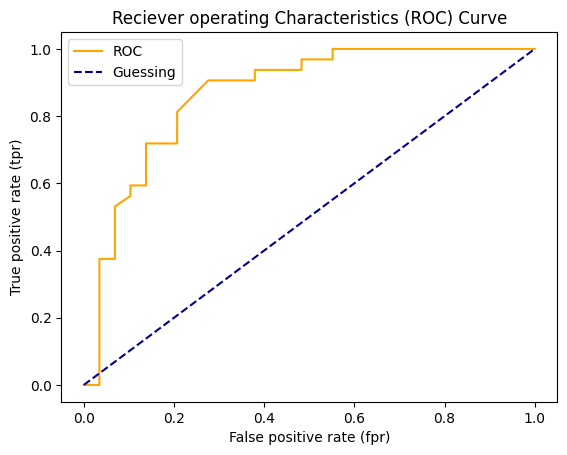

In [107]:
#  Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate(tpr)
    """
    #  plot ROC curve
    plt.plot(fpr, tpr, color = "orange", label="ROC")

    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

    # Customise the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [108]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

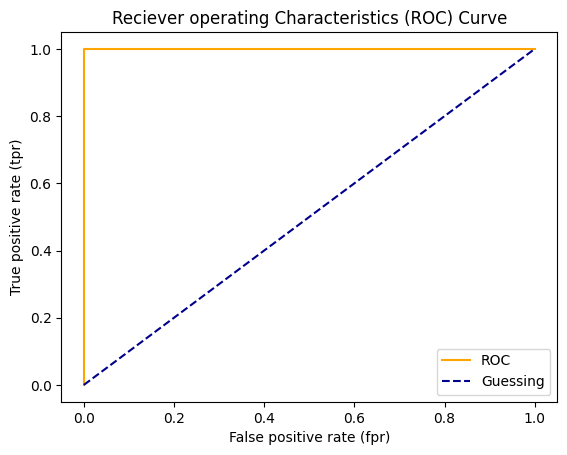

In [109]:
#  Plot perfect ROC curve and AUC score
fpr, tpr, threasholds = roc_curve(y_test, y_test)

plot_roc_curve(fpr, tpr)


In [110]:
#  perfect AUC score
roc_auc_score(y_test, y_test)

1.0

## 131

## 132

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was suppose to predict.

In essence, giving you an idea of where the model is getting confused.

In [111]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [112]:
#  Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [113]:
23+6+6+26

61

In [114]:
len(y_preds)

61

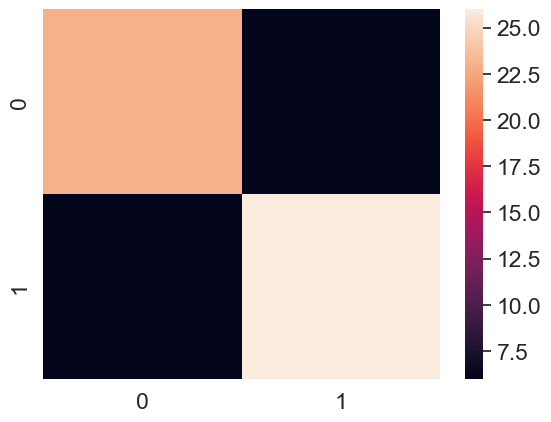

In [115]:
#  Make our confusion matrix more visual with Seaborn's heatmap()

import seaborn as sns

#  Set the font scale 
sns.set(font_scale=1.5)

# Create a  confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn()
sns.heatmap(conf_mat);

## 133

**Confusion Matrix**

The next way to evaluate a classification model is by using a confusion matrix.

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was suppose to predict.

In essence, giving you an idea of where the model is getting confused.

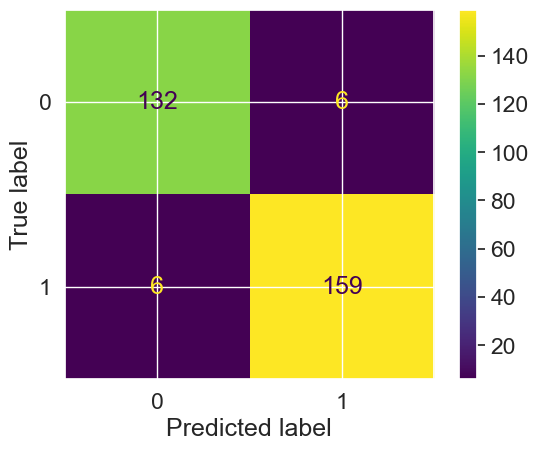

In [116]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

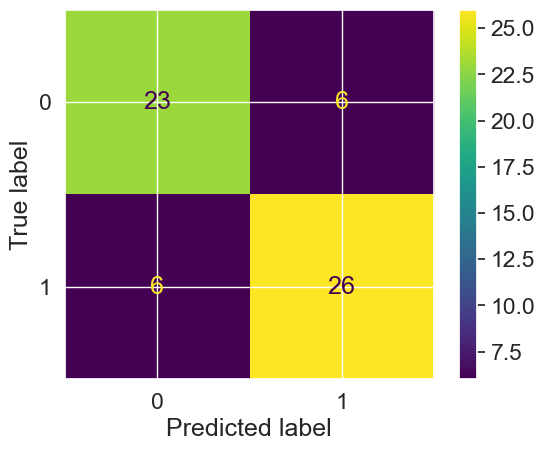

In [117]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

## 134

**Classification Report**



In [118]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [119]:
#  Where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predict every case as zero 
pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

d:\Projects\ml_course\env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Projects\ml_course\env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Projects\ml_course\env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## 135

### 4.2.2 Regression model evaluation medal matrix

The once we're going to cover are:
1. R^2 (pronounced r-square) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean square error(MSE)

In [120]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y=  housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8065734772187598

In [121]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [122]:
y_test.mean()

2.0550030959302323

In [123]:
from sklearn.metrics import r2_score

# Fill an array with y_test means

y_test_mean = np.full(len(y_test), y_test.mean())


In [124]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [125]:
r2_score(y_test, y_pred=y_test_mean)

0.0

In [126]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

## 136

**Mean Absolute error**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [127]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [128]:
df = pd.DataFrame(data={"actual values": y_test, "predicted values": y_preds})

df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [129]:
# MAE using formulas and differences 
np.abs(df["differences"]).mean()

0.32659871732073664

## 137

**Mean Squared error (MSE)**

MSE is the mean of the square of the errors between the actual and predicted values.

In [130]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)

In [131]:
mse

0.2534678520824551

In [132]:
df["squared differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [133]:
#  Calculate MSE by hand

squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [134]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared differences"] = 16

In [135]:
df_large_error

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [136]:
#  Calculate MSE with large error

df_large_error["squared differences"].mean()

0.2573437523766412

In [137]:

df_large_error.iloc[1:100] = 20


In [138]:
df_large_error["squared differences"].mean()

0.7334180712088106

## 138

## 139

### 4.2.3 Finally using the scoring parameter

In [139]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

# Cross validation accuracy 
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if scoring is None, estimator's default scoring evaluation metric is used (Accuracy for classification model)
cv_acc



array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [140]:
# Cross-validated accuracy
print(f"The cross validated accuracy is: {np.mean(cv_acc) * 100: .2f}%")

The cross validated accuracy is:  82.48%


In [141]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [142]:
# Cross-validated accuracy
print(f"The cross validated accuracy is: {np.mean(cv_acc) * 100: .2f}%")

The cross validated accuracy is:  82.48%


In [143]:
#  Precision

cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.76315789, 0.90322581, 0.83870968, 0.79411765, 0.74358974])

In [144]:
# Cross-validated precision
print(f"The cross validated precision is: {np.mean(cv_precision)}")

The cross validated precision is: 0.8085601538512754


In [145]:
#  Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")

cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [146]:
# Cross-validated recall
print(f"The cross validated recall is: {np.mean(cv_recall)}")

The cross validated recall is: 0.8545454545454545


let's see the `scoring` parameter being using for a regression problem .

In [147]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)



In [148]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [149]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [150]:
#  Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4303784827892982

In [151]:
cv_mse

array([-0.52608501, -0.34777555, -0.37442498, -0.43875233, -0.46485455])

In [152]:
#  Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.46680736586240323

In [153]:
cv_mae

array([-0.54516475, -0.41053355, -0.43822559, -0.46671669, -0.47339624])

## 140

## 4.3 using different evaluation metrics as Sciket-Learn functions

The third way to evaluate scikit-learn machine learning model/estimators is to use the `sklearn.metrics` module 

In [154]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model using evaluate function
print(f"Accuracy : {accuracy_score(y_test, y_preds)*100 :.2f}%")
print(f"Precision : {precision_score(y_test, y_preds)}")
print(f"Recall : {recall_score(y_test, y_preds)}")
print(f"F1 : {f1_score(y_test, y_preds)}")


Accuracy : 85.25%
Precision : 0.8484848484848485
Recall : 0.875
F1 : 0.8615384615384615


In [155]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  train_test_split

np.random.seed(42)

# Create X and y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model using evaluate function
print(f"R2 Score : {r2_score(y_test, y_preds)}")
print(f"MAE : {mean_absolute_error(y_test, y_preds)}")
print(f"MSE : {mean_squared_error(y_test, y_preds)}")


R2 Score : 0.8065734772187598
MAE : 0.32659871732073664
MSE : 0.2534678520824551


In [156]:
what_were_covering

['0. an end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/ algorithm for our problems.',
 '3. Fit the model/ algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. putting it all together']

## 141

## 5. Improving a model

First predictions = baseline predictions.
First Model = baseline model.

From a data perspective:
* Could we collect more data? (Generally, more data, the better) 
* Could we improve our data? 

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs parameters
* Parameters = models find these patterns in the data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparametes:

1. By hand
2. Randomly with `RandomSearchCV`
3. Exhaustively with `GridSearchCV` 

In [157]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [158]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 142

### 5.1 tuning hyper parameters by hand

Let's make 3 sets, training, validation and test.

We're going to try and adjust :

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [159]:
def evaluate_preds(y_true, y_preds):
    """
    Perform evaluation comparison on y_true labels vs y_pred labels on a classification model.
    """

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2), "precision": round(precision, 2), "recall": round(recall, 2), "f1": round(f1, 2)}

    print(f"Acc: {accuracy * 100: .2f}%")
    print(f"Precision: {precision: .2f}")
    print(f"Recall: {recall: .2f}")
    print(f"F1 Score: {f1: .2f}")

    return metric_dict
    


In [160]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]


# Split tha data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of  data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split: valid_split], y[train_split: valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

clf =RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

C:\Users\roope\AppData\Local\Temp\ipykernel_11680\3644984022.py:17: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X_train, y_train = X[:train_split], y[:train_split]
C:\Users\roope\AppData\Local\Temp\ipykernel_11680\3644984022.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X_valid, y_valid = X[train_split: valid_split], y[train_split: valid_split]
C:\Users\roope\AppData\Local\Temp\ipykernel_11680\3644984022.py:19: FutureWarning: The behavior of `series[i:j]` with an integer

Acc:  82.22%
Precision:  0.81
Recall:  0.88
F1 Score:  0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [161]:
np.random.seed(42)

#  Create a second classifier with different hyper parameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

#  Make predictions with different hyper parameters
y_preds_2 = clf_2.predict(X_valid)

#  Evaluate the second classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

clf_2_metrics

Acc:  82.22%
Precision:  0.84
Recall:  0.84
F1 Score:  0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

## 143

### 5.2 Hyper parameter tuning with RandomizeSearchCV

In [164]:
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200], "max_depth": [None, 5, 10, 20, 30], "max_features": ["auto", "sqrt"],
        "min_samples_split": [2,4,6], "min_samples_leaf": [1,2,4]}

np.random.seed(42)
# Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV

rs_clf = RandomizedSearchCV(
    estimator=clf, 
    param_distributions=grid,
    n_iter=10, # no of models to try
    cv=5,
    verbose=2
    )

# Fit the RandomizedSearchCV version of clf\
rs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

d:\Projects\ml_course\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Projects\ml_course\env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Projects\ml_course\env\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "d:\Projects\ml_course\env\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "d:\Projects\ml_course\env\lib\site-pack

In [165]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [166]:
# Make predictions with the best hyper parameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

rs_metrics

Acc:  81.97%
Precision:  0.77
Recall:  0.86
F1 Score:  0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## 144